In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [2]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
K = 140  # количество повторений для оценки gamma*

In [3]:
gamma_star_list = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s2 = np.var(X, ddof=1)
    delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
    sigma2_left = (n - 1) * s2 / delta_0
    sigma2_right = (n - 1) * s2 / delta_1
    # Проверяем, попадает ли истинная дисперсия в интервал
    if sigma2_left <= sigma2 <= sigma2_right:
        gamma_star_list.append(1)
    else:
        gamma_star_list.append(0)

gamma_star = np.mean(gamma_star_list)
print(f"1. Фактическая γ*: {gamma_star}")

1. Фактическая γ*: 0.9125714285714286


In [4]:
# 2. Повторить пункт 1, K раз, для получения массива gamma*
gamma_star_values = []

for _ in range(K):
    gamma_star_list = []
    for _ in range(M):
        X = np.random.normal(a, sigma, size=n)
        s2 = np.var(X, ddof=1)
        delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
        delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
        sigma2_left = (n - 1) * s2 / delta_0
        sigma2_right = (n - 1) * s2 / delta_1
        if sigma2_left <= sigma2 <= sigma2_right:
            gamma_star_list.append(1)
        else:
            gamma_star_list.append(0)
    gamma_star_values.append(np.mean(gamma_star_list))

In [5]:
# Характеристики распределения gamma*
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values)

print(f"2. Математическое ожидание γ*: {mean_gamma_star}")
print(f"2. Дисперсия γ*: {var_gamma_star}")


2. Математическое ожидание γ*: 0.9098040816326531
2. Дисперсия γ*: 4.822983756768021e-05


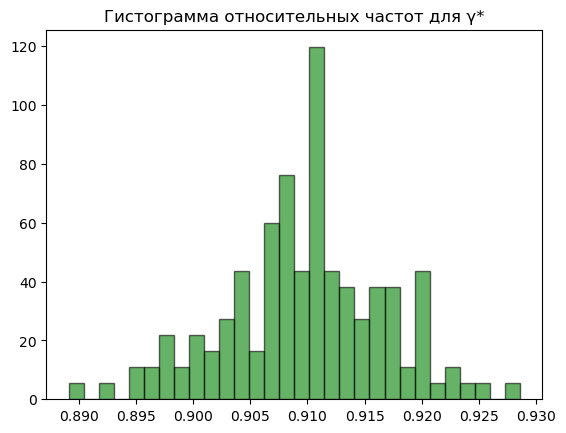

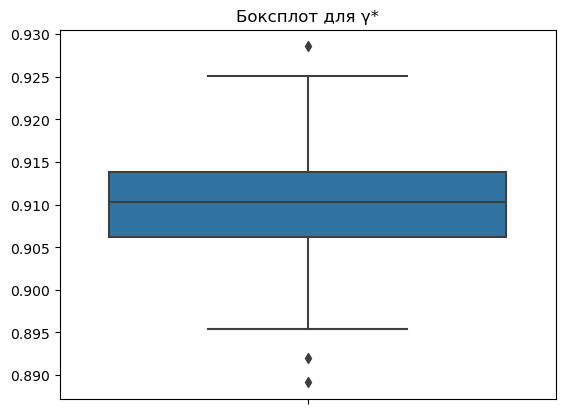

In [6]:
# Построение гистограммы и боксплота
plt.hist(gamma_star_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title("Гистограмма относительных частот для γ*")
plt.show()

sb.boxplot(y=gamma_star_values)
plt.title("Боксплот для γ*")
plt.show()

In [7]:
# 3 Смоделировать M выборок из n значений СВ W
sample_size_U = 7
true_variance_u = 9
true_variance_W = true_variance_u/sample_size_U
true_a = 3
count_g = 0
M_variance_array = []
for i in range(M):
    W = []
    for j in range(n):
        U = np.random.exponential(scale = true_a, size=sample_size_U)
        W_i = sum(U) / 7
        W.append(W_i)
    s2_W = np.var(W, ddof = 1)
    d_high = st.chi2.ppf(1/2+gamma/2, df = n-1)
    d_low = st.chi2.ppf(1/2-gamma/2, df = n-1)
    s2_low = (n-1) * s2_W / d_high
    s2_high = (n-1) * s2_W / d_low
    if s2_low <= true_variance_W <= s2_high: 
        count_g += 1
    M_variance_array.append((s2_low,s2_high))
gamma_star = count_g/M
print("Доверительные интервалы для каждой из M выборок: ", M_variance_array)
print("Точечная оценка gamma*: ", gamma_star)
#Примечание: Отклонение оценки от настоящей gamma обусловлено малой выборкой из U, обычно она должна быть >25

Доверительные интервалы для каждой из M выборок:  [(0.5064224976542818, 1.561228534662413), (0.5030983939231245, 1.5509807956277157), (0.5764264119692654, 1.7770406462349622), (0.5347124498154828, 1.648442433655607), (0.8848026037214186, 2.7277205868063557), (0.5202422665967864, 1.603832916804631), (0.565922482918037, 1.744658526884407), (1.0433972368776612, 3.216645284809946), (1.0001412474123195, 3.0832932213428714), (0.6779430350016536, 2.0900019569090555), (0.9316429835883507, 2.872122816093973), (1.82826457838296, 5.636279671430765), (0.41245977076825574, 1.2715548114596564), (0.8960726504804533, 2.762464538089492), (0.9122649813202636, 2.8123831911250528), (1.038676149195962, 3.2020908429408492), (0.4986524283980721, 1.537274516238494), (0.6347174662839922, 1.9567436762805084), (0.7255479787766056, 2.2367612279855003), (0.4399766209147726, 1.3563853468955034), (1.1427535368268043, 3.5229466266689204), (0.5018655971966408, 1.547180258653668), (0.8581798834203722, 2.645646526517066

In [8]:
# 4 Смоделировать K выборок из M, получение массива gamma_star
sample_size_U = 7
true_variance_u = 9
true_variance_W = true_variance_u/sample_size_U
true_a = 3
gamma_star_values = []
for _ in range(K):
    count_g = 0
    for i in range(M):
        W = []
        for j in range(n):
            U = np.random.exponential(scale = true_a, size=sample_size_U)
            W_i = sum(U) / 7
            W.append(W_i)
        s2_W = np.var(W, ddof = 1)
        d_high = st.chi2.ppf(1/2+gamma/2, df = n-1)
        d_low = st.chi2.ppf(1/2-gamma/2, df = n-1)
        s2_low = (n-1) * s2_W / d_high
        s2_high = (n-1) * s2_W / d_low
        if s2_low <= true_variance_W <= s2_high: 
            count_g += 1
    gamma_star = count_g/M
    gamma_star_values.append(gamma_star)

KeyboardInterrupt: 

In [9]:
# Выборочные числовые характеристики
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values, ddof=1)
std_gamma_star = np.std(gamma_star_values, ddof=1)
median_gamma_star = np.median(gamma_star_values)

In [10]:
print(f"Среднее значение gamma*: {mean_gamma_star}")
print(f"Дисперсия gamma*: {var_gamma_star}")
print(f"Стандартное отклонение gamma*: {std_gamma_star}")
print(f"Медиана gamma*: {median_gamma_star}")

Среднее значение gamma*: 0.861265306122449
Дисперсия gamma*: 6.1020282316420935e-05
Стандартное отклонение gamma*: 0.007811548010248733
Медиана gamma*: 0.8611428571428571


Text(0, 0.5, 'Относительная частота')

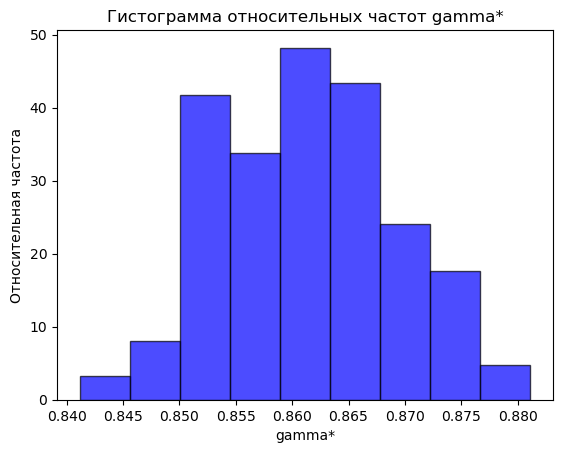

In [11]:
# Гистограмма
plt.hist(gamma_star_values, bins="sturges", density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')

<Axes: >

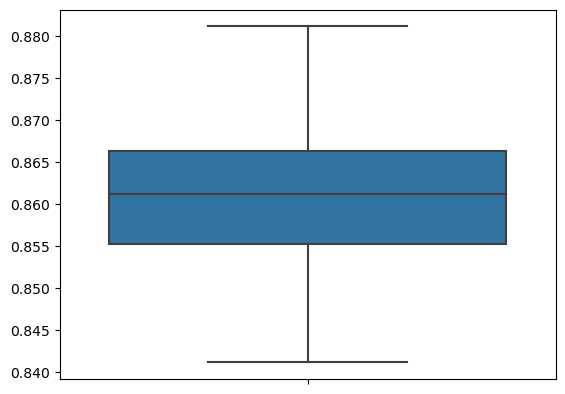

In [12]:
# Боксплот
sb.boxplot(y = gamma_star_values)

Распределение походит на нормальное?